# Image filtering

This ipynb notebook contains code that is not complete! Carefully check during class and type the correct code whereever you see **```NNNNNNNNN```**

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline

In [2]:
img = cv.imread('./interstellar.jpg')
# print some information about the image
print(img.shape)
print(type(img))

(1500, 1196, 3)
<class 'numpy.ndarray'>


So, now we know that our image has a certain size and is stored as a ```numpy``` array of - in this case - three dimensions.

Now, let's next look at the image using OpenCV's built-in ```imshow``` function like so:

In [3]:
# let's make the image first a bit smaller
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
rimg = cv.resize(img, dim, interpolation = cv.INTER_AREA)

# the first parameter for the imshow function simply gives
# the title string for the window and the second the actual
# image array as numpy data
cv.imshow('parasite',rimg)
# these two lines are necessary so that control is given back 
# to the browser and jupyter when we show the images 

# waits for a key indefinitely - blocking processing
cv.waitKey(1)
# once key has been pressed destroy all windows
cv.destroyAllWindows()

Let's use ```matplotlib``` to show the picture

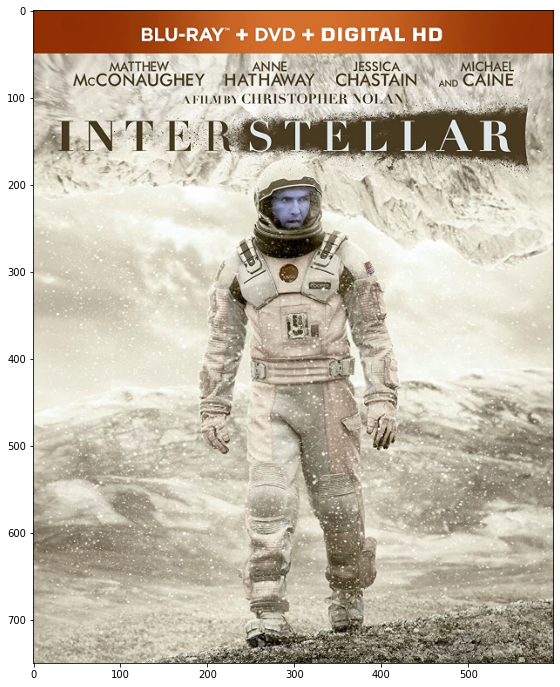

In [4]:
plt.figure(None, figsize=(12, 12))
plt.imshow(rimg)
plt.show()

Urgh. The colors are completely different. 

This is because OpenCV stores images in BGR (BLUE - GREEN - RED) format, rather than the usual RGB (RED - GREEN - BLUE) format from other languages. So, if we want to show the image properly with ```matplotlib``` we have to convert the image first.

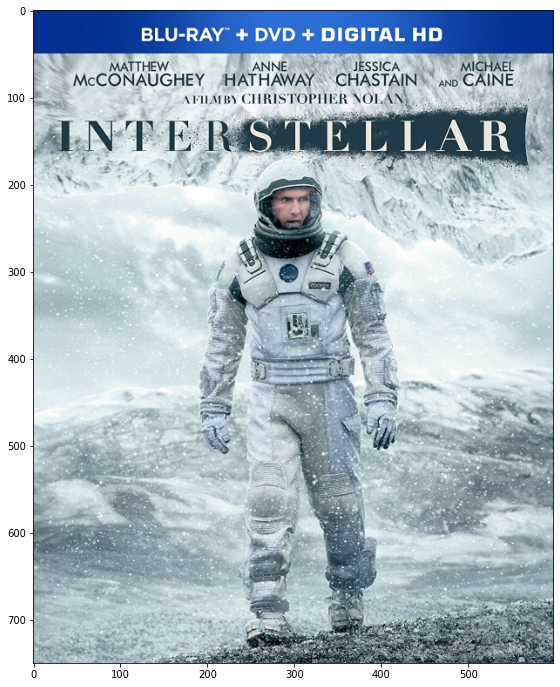

In [5]:
mrimg = cv.cvtColor(rimg, cv.COLOR_BGR2RGB)
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg)
plt.show()

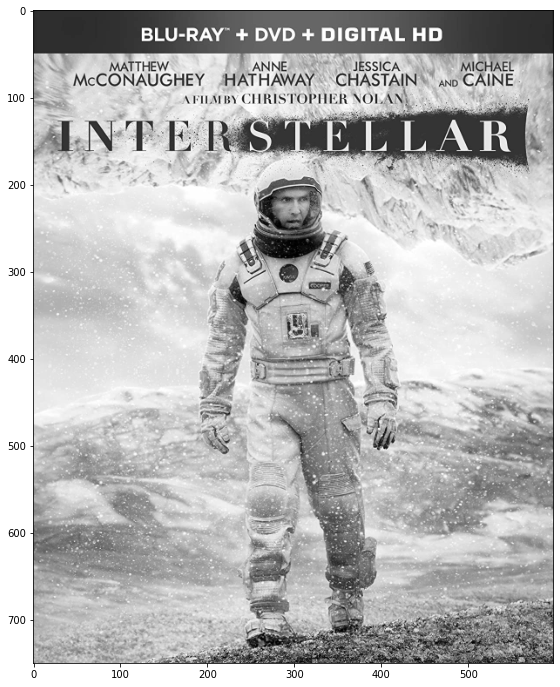

In [6]:
mrimg = cv.cvtColor(rimg, cv.COLOR_BGR2GRAY)
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg,cmap='gray')
plt.show()

Now, let's cut out a section of the image and let's display it as a grid of values. Most of the code below is to make sure that the plotting works fine and that we can add the pixel intensity values in a nice way to the plot. 

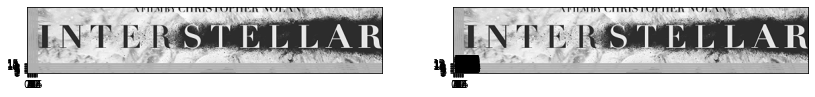

In [7]:
roi = mrimg[100:200,10:550]
# the extent variable is important for ensuring the right
# kind of plotting area!
extent = (0,540,0,100)
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(roi,cmap='gray',extent=extent)
ax = plt.gca()
# this makes sure we have the correct grid lines
major_ticks = np.arange(0, 16, 1)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
plt.grid(True)
plt.subplot(1,2,2)
plt.imshow(roi,cmap='gray',extent=extent)
ax = plt.gca()
major_ticks = np.arange(0, 16, 1)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# plots pixel intensity values with text color depending on 
# the pixel value
for i in range(0,15):
    for j in range(0,15):
        if roi[j,i]>127:
            plt.text(i+0.1,j+0.6,str(roi[j,i]),color='black')
        else:
            plt.text(i+0.1,j+0.6,str(roi[j,i]),color='white')
plt.grid(True)

Next, let's plot the image function F(x,y) as a surface.

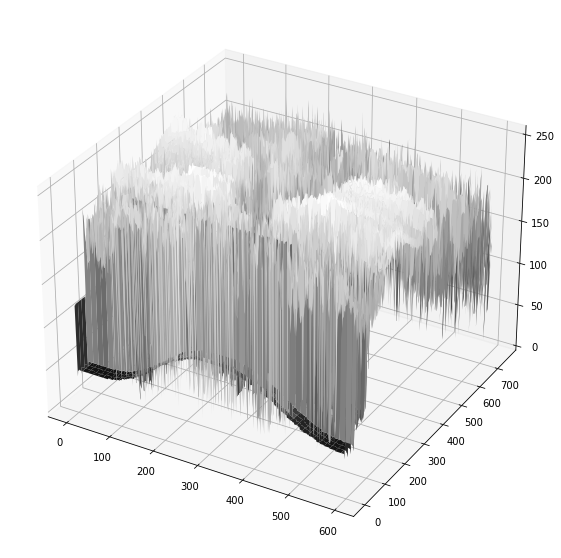

In [8]:
fig = plt.figure(None, figsize=(10, 10))
ax = fig.gca(projection='3d')
x = np.arange(0, mrimg.shape[1], 1)
y = np.arange(0, mrimg.shape[0], 1)
xx, yy = np.meshgrid(x, y)
ax.plot_surface(xx,yy,mrimg,cmap='gray')
plt.show()

Let's add something to our function

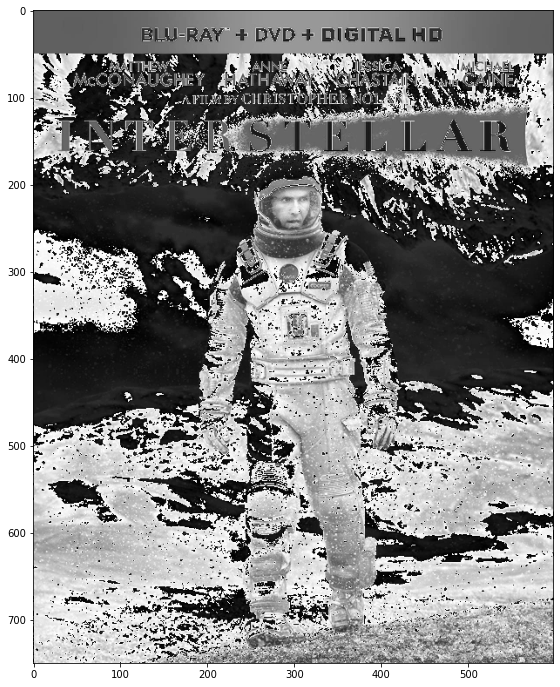

In [9]:
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg+50,cmap='gray')
plt.show()

That result cannot be correct - some parts of the image turn black, when actually the whole image should get brighter. This is because of clipping!

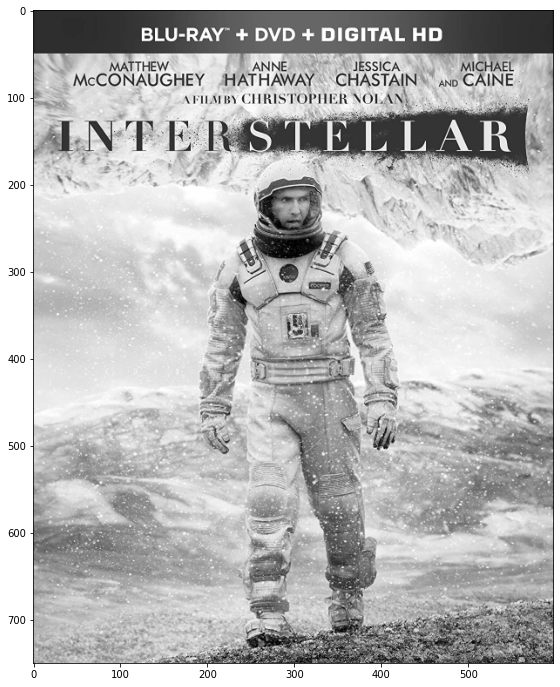

In [10]:
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg*0.9,cmap='gray')
plt.show()

Here's the inverse of the image

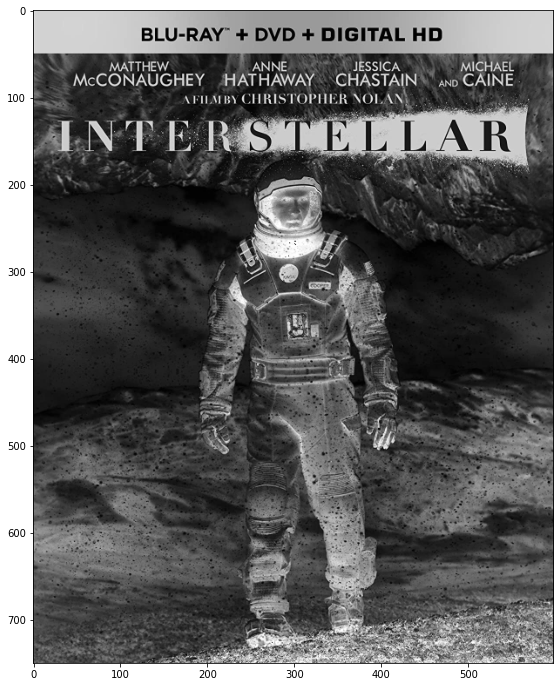

In [11]:
plt.figure(None, figsize=(12, 12))
plt.imshow(-mrimg,cmap='gray')
plt.show()

# Filtering

Let's apply our simple retina-like filter to a signal

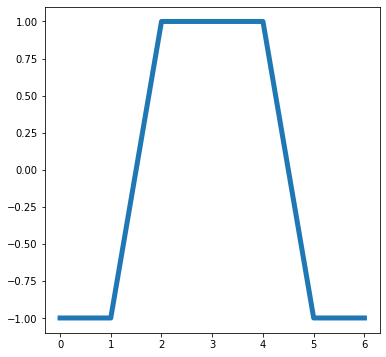

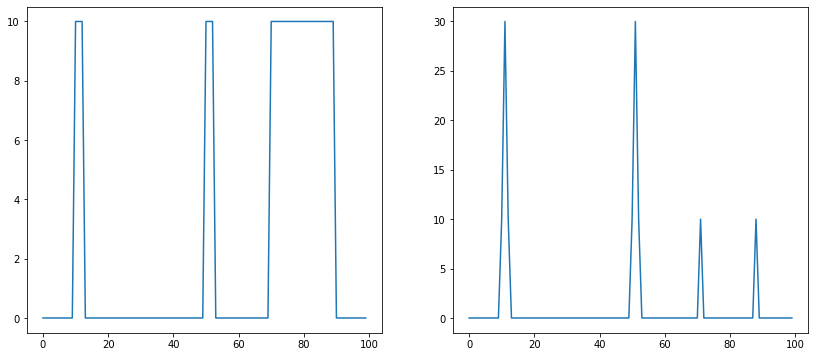

In [12]:
signal = np.zeros((100,1))
signal[10:13]=10;
signal[50:53]=10;
signal[70:90]=10;

filtered_signal = np.zeros_like(signal)
weights = np.array((-1,-1,1,1,1,-1,-1))
plt.figure(None, figsize=(6, 6))
plt.plot(weights,linewidth=5)
for i in range(3,len(signal)-3):
    filtered_signal[i]=np.dot(weights,signal[i-3:i+4])
    if filtered_signal[i]<0:
        filtered_signal[i]=0
    
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(signal)
plt.subplot(1,2,2)
plt.plot(filtered_signal)
plt.show()

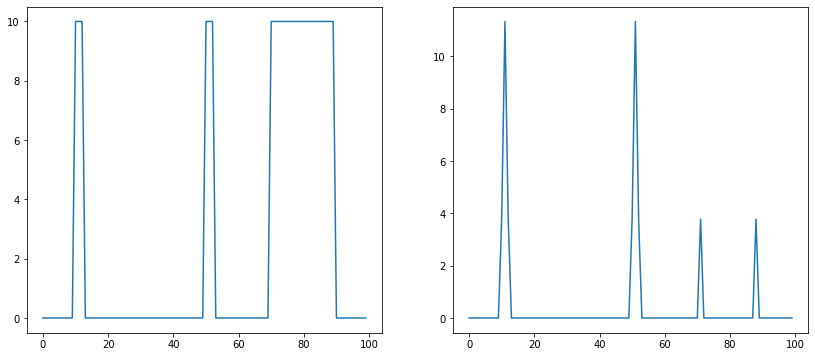

In [13]:
weights = np.array((-1,-1,1,1,1,-1,-1))
weights = weights/np.linalg.norm(weights, ord=2, keepdims=True)
for i in range(3,len(signal)-3):
    filtered_signal[i]=np.dot(weights,signal[i-3:i+4])
    if filtered_signal[i]<0:
        filtered_signal[i]=0
    
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(signal)
plt.subplot(1,2,2)
plt.plot(filtered_signal)
plt.show()

## Scanline
Let's see what the image function says for our picture at one scanline.

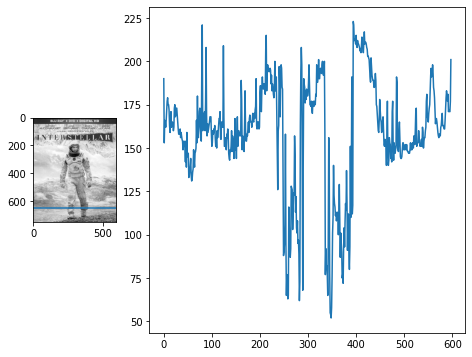

In [14]:
cuty = 650
plt.figure(None, figsize=(14, 6))
grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.imshow(mrimg,cmap='gray')
plt.plot((0,mrimg.shape[1]-1),(cuty,cuty))
plt.subplot(grid[0, 1:4])
oneline = mrimg[cuty,:]
plt.plot(oneline)
plt.show()

## Filtering one image line
Let's apply our filter to the scanline in the image.

In [15]:
newoneline = np.zeros_like(oneline)
weights = (-1,-1,1,1,1,-1,-1)
for i in range(3,len(oneline)-3):
    newoneline[i]=np.dot(weights,oneline[i-3:i+4])

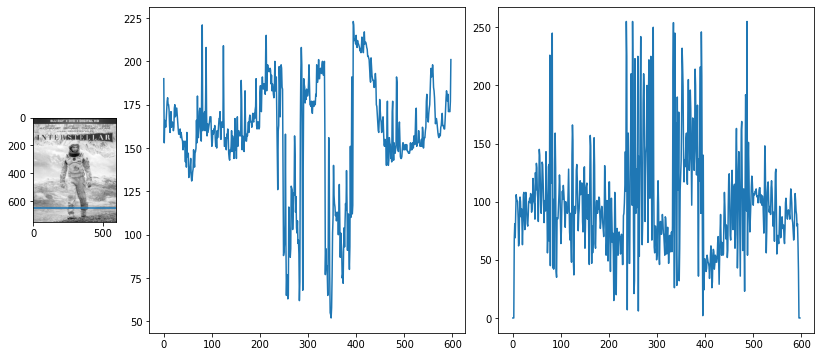

In [16]:
plt.figure(None, figsize=(14, 6))
grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.imshow(mrimg,cmap='gray')
plt.plot((0,mrimg.shape[1]-1),(cuty,cuty))
plt.subplot(grid[0, 1:4])
plt.plot(oneline)
plt.subplot(grid[0, 4:])
plt.plot(newoneline)
plt.show()

## Filtering in 2D
Let's take the simple averaging filter and run it across the image.

In [17]:
weights2d = [
[1,1,1],[1,1,1],[1,1,1]
]
weights2d = np.array(weights2d, dtype=np.float64)

In [18]:
filteredmrimg = np.zeros_like(mrimg)
for i in range(1,mrimg.shape[1]-1):
    for j in range(1,mrimg.shape[0]-1):
        sum=0.0
        for k in range(len(weights2d[1])):
            for p in range(len(weights2d[0])):
                sum += mrimg[j-1+k, i-1+p] * weights2d[k, p]
        filteredmrimg[j ,i] = sum/(len(weights2d[1]) * len(weights2d[0]))

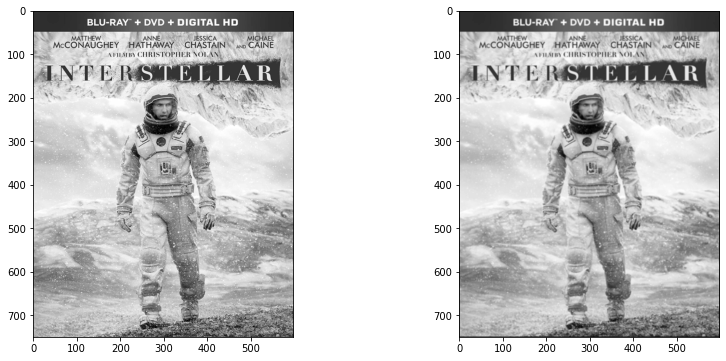

In [19]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(mrimg,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filteredmrimg,cmap='gray')
plt.show()

In [20]:
# this function will filter an roi using a set of weights
def filter_and_plot(weights,roi):
    # these two lines are important as they ensure correct
    # computations!
    weights = weights.astype(np.float64)
    roi = roi.astype(np.float64)
    # this holds the end result
    filtered = np.zeros_like(roi)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)
    # do the filtering
    for i in range(height,roi.shape[1]-height):
        for j in range(width,roi.shape[0]-width):
            sum=0.0
            for k in range(len(weights[1])):
                for p in range(len(weights[0])):
                    sum += roi[j-height+k, i-width+p] * weights[k, p]
            filtered[j ,i] = sum/(len(weights[1]) * len(weights[0]))
    # plot the original, the filter, and the filtered image
    plt.figure(None, figsize=(14, 6))
    grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
    plt.subplot(grid[0, 0:3])
    plt.imshow(roi,cmap='gray')
    plt.subplot(grid[0, 3])
    extent = (0, weights.shape[1], weights.shape[0], 0)
    plt.imshow(weights,cmap='gray',extent=extent)
    plt.axis('off')
    if width<5:
        for i in range(0,len(weights)):
            for j in range(0,len(weights)):
                if weights[i,j]>0.5*np.max(weights):
                    plt.text(j+0.1,i+0.6,'{0:.2f}'.format(weights[i,j]),color='black')
                else:
                    plt.text(j+0.1,i+0.6,'{0:.2f}'.format(weights[i,j]),color='white')
    plt.grid(True)
    plt.subplot(grid[0, 4:])
    plt.imshow(filtered,cmap='gray')
    plt.show()
    return filtered

In [21]:
faceroi = mrimg[180:280,250:350]

## Different filters
Let's try out a few simple filters.

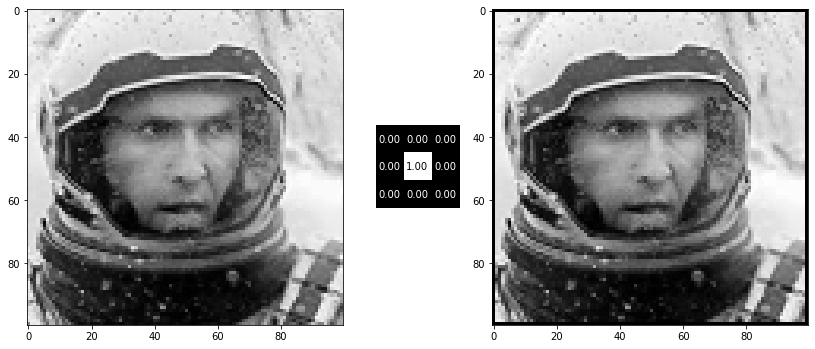

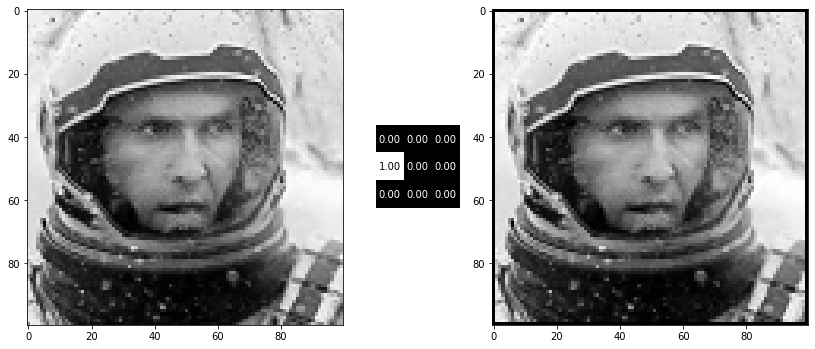

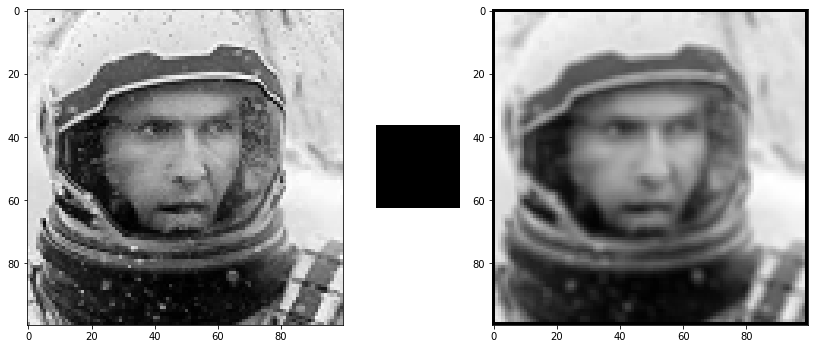

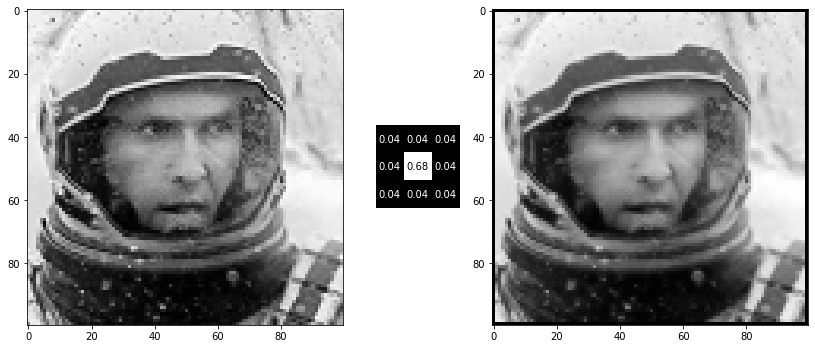

In [22]:
filter_id = np.array([
[0, 0, 0], [0, 1, 0], [0, 0, 0]
])
filter_id = 1/np.sum(filter_id)*filter_id

filter_and_plot(filter_id,faceroi)

filter_left = np.array([
[0, 0, 0], [1, 0, 0], [0, 0, 0]
])
filter_left = 1/np.sum(filter_left)*filter_left


filter_and_plot(filter_left,faceroi)

filter_blur = np.array([
[0.11, 0.11, 0.11], [0.11, 0.11, 0.11], [0.11, 0.11, 0.11]
])
filter_blur = 1/np.sum(filter_blur)*filter_blur


filter_and_plot(filter_blur,faceroi)


filter_contrast = np.array([
    [0.11, 0.11, 0.11], [0.11, 1.89, 0.11], [0.11, 0.11, 0.11]
])
filter_contrast = 1/np.sum(filter_contrast)*filter_contrast


fc = filter_and_plot(filter_contrast,faceroi)

## Larger blur
Let's use a bigger averaging filter and see its effects.

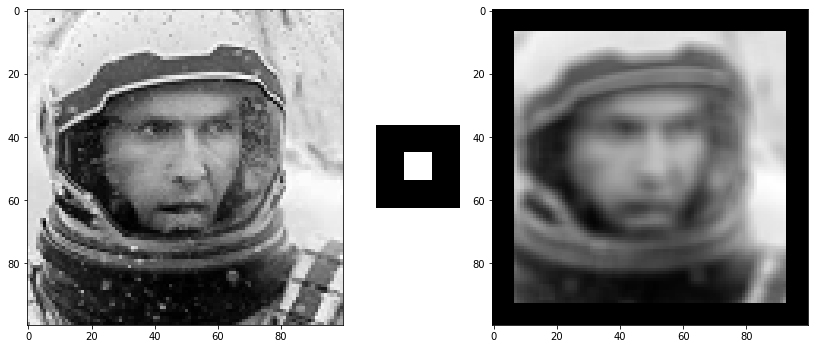

In [23]:
filter_blur_big = np.zeros((15,15))
filter_blur_big[5:10,5:10]=1
filter_blur_big = 1/np.sum(filter_blur_big)*filter_blur_big
f=filter_and_plot(filter_blur_big,faceroi)

## High-pass
Here's the difference between the blurred and the original iamge. Per definition it contains the high frequencies.

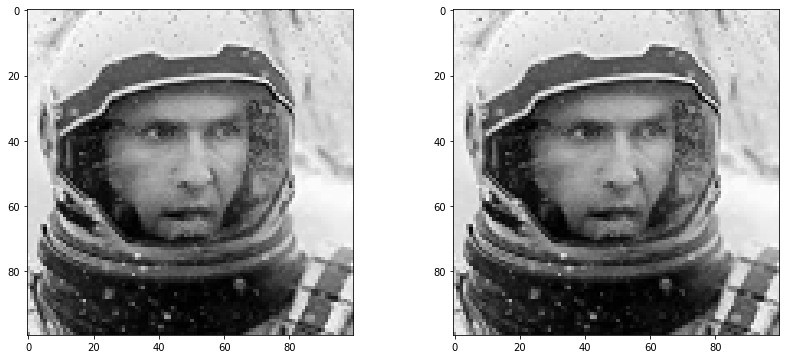

In [24]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(faceroi,cmap='gray')
plt.subplot(1,2,2)
diffimg = faceroi-f
plt.imshow(diffimg,cmap='gray')
plt.show()

## Gradual sharpening
Let's add more and more of the difference image to the blurred image

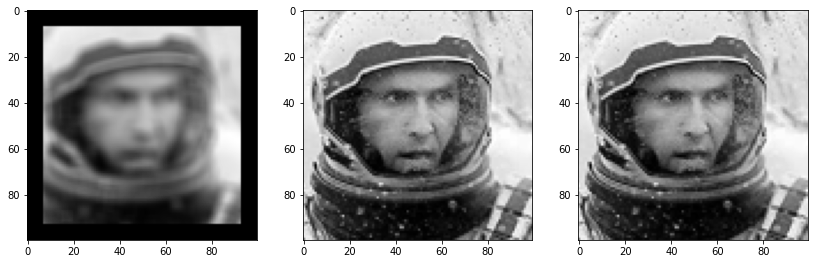

In [25]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.subplot(1,3,2)
f = f.astype(float)
plt.imshow(f+0.3*diffimg,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(f+0.6*diffimg,cmap='gray')
plt.show()

## Derivatives
Now, let's derive our image function using the simple derivative approximation.

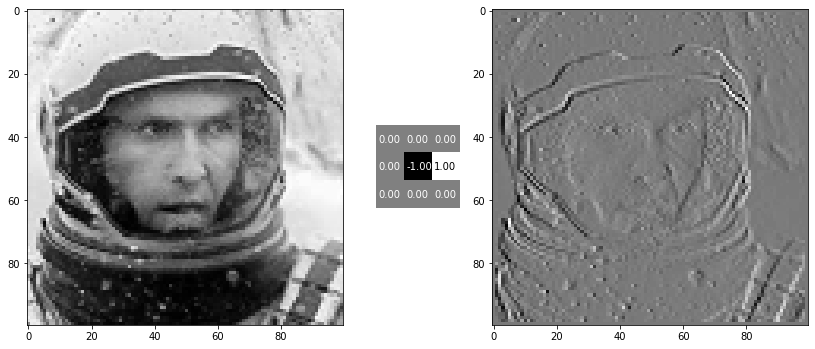

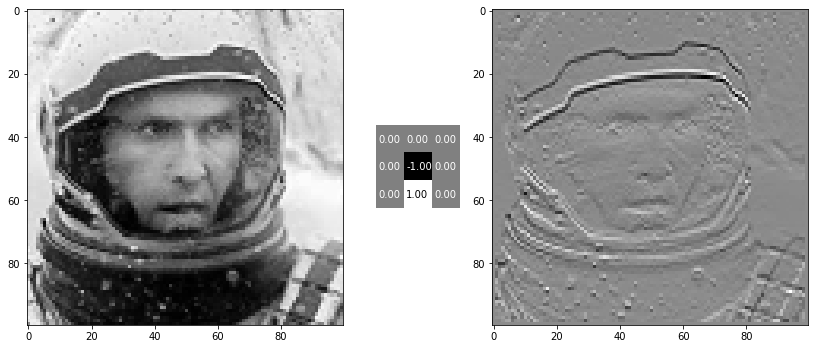

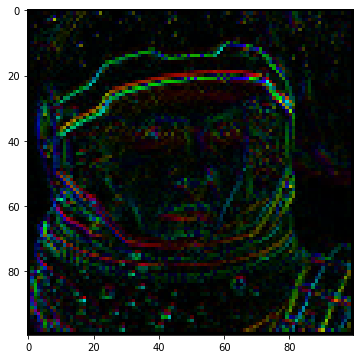

In [26]:
filter_dx = np.array([
[0, 0, 0], [0, -1, 1], [0, 0, 0]
])
fdx=filter_and_plot(filter_dx,faceroi)

filter_dy = np.array([
[0, 0, 0], [0, -1, 0], [0, 1, 0]
])
fdy=filter_and_plot(filter_dy,faceroi)

plt.figure(None, figsize=(6, 6))
hsv = np.zeros((fdx.shape[1],fdx.shape[0],3))
hsv[...,1] = 255
ang = np.arctan2(fdx,fdy)
hsv[...,0] = ang*180/np.pi
mag = np.sqrt(fdx*fdx+fdy*fdy)
hsv[...,2] = (mag-np.min(mag))/(np.max(mag)-np.min(mag))*255
plt.imshow(cv.cvtColor(np.uint8(hsv),cv.COLOR_HSV2RGB_FULL))
plt.show()

## Sobel filter
Let's implement the simple Gaussian derivative filter approximation - the Sobel filters.

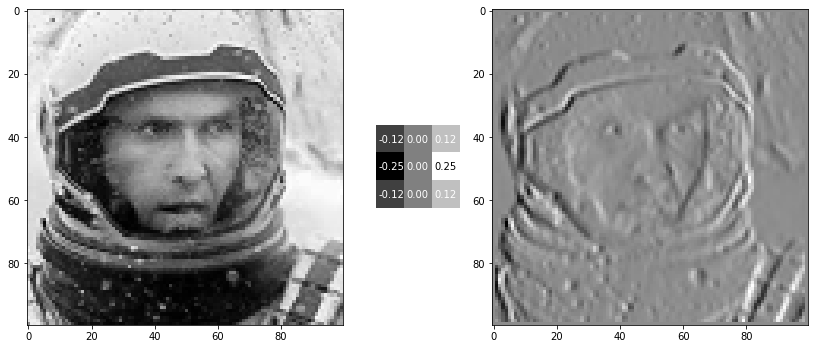

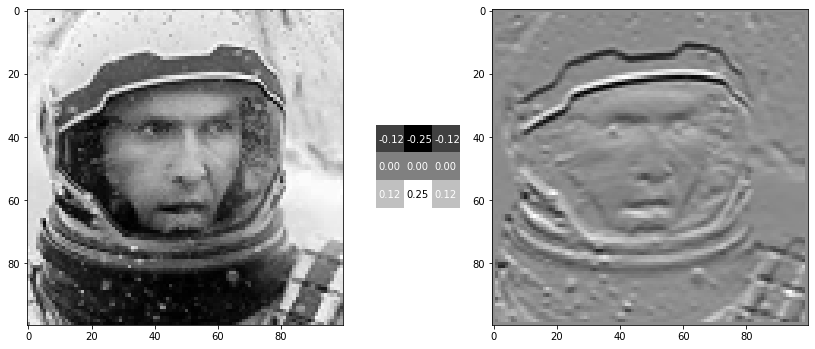

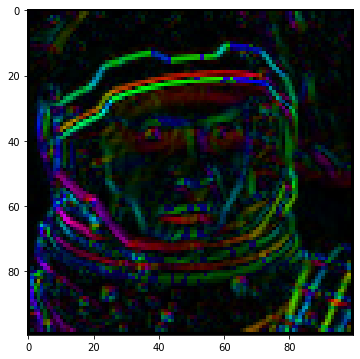

In [27]:
filter_sobelx = np.array([
[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]
])
fsx=filter_and_plot(1/8*filter_sobelx,faceroi)

filter_sobely = np.array([
[-1, -2, -1], [0, 0, 0], [1, 2, 1]
])
fsy=filter_and_plot(1/8*filter_sobely,faceroi)

plt.figure(None, figsize=(6, 6))
hsv = np.zeros((fsx.shape[1],fsx.shape[0],3))
hsv[...,1] = 255
ang = np.arctan2(fsx,fsy)
hsv[...,0] = ang*180/np.pi
mag = np.sqrt(fsx*fsx+fsy*fsy)
hsv[...,2] = (mag-np.min(mag))/(np.max(mag)-np.min(mag))*255
plt.imshow(cv.cvtColor(np.uint8(hsv),cv.COLOR_HSV2RGB_FULL))
plt.show()

In [28]:
# this function will filter an roi using a set of weights
def filter(weights,roi):
    # these two lines are important as they ensure correct
    # computations!
    weights = weights.astype(np.float64)
    roi = roi.astype(np.float64)
    # this holds the end result
    filtered = np.zeros_like(roi)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)
    # do the filtering
    for i in range(height,roi.shape[1]-height):
        for j in range(width,roi.shape[0]-width):
            sum=0.0
            for k in range(len(weights[1])):
                for p in range(len(weights[0])):
                    sum += roi[j-height+k, i-width+p] * weights[k, p]
            filtered[j ,i] = sum/(len(weights[1]) * len(weights[0]))
    return filtered

###### Normalized box-filter definition. Since there are normalization in the 'filter' function, we do not need to normalize the filter.

In [31]:
normalized_box_filter3 = np.ones([3, 3])
normalized_box_filter5 = np.ones([5, 5])
normalized_box_filter9 = np.ones([9, 9])
normalized_box_filter15 = np.ones([15, 15])
normalized_box_filter23 = np.ones([23, 23])

In [32]:
import time

In [35]:
normalized_box_filters = [normalized_box_filter3,
                         normalized_box_filter5,
                         normalized_box_filter9,
                         normalized_box_filter15,
                         normalized_box_filter23]

times_filter = []

for weight in normalized_box_filters:
    time_sum = 0.0
    for _ in range(20):
        start_time = time.time()
        _ = filter(weight, roi)
        time_spent = time.time() - start_time
        time_sum += time_spent
    time_avg = time_sum / 20.0
    print(time_avg)
    times_filter.append(time_avg)

times_cv2 = []
    
for weight in normalized_box_filters:
    time_sum = 0.0
    for _ in range(20):
        start_time = time.time()
        _ = cv.filter2D(roi, -1, weight)
        time_spent = time.time() - start_time
        time_sum += time_spent
    time_avg = time_sum / 20.0
    print(time_avg)
    times_cv2.append(time_avg)

0.38496153354644774
0.8424301862716674
2.337668800354004
5.751756477355957
11.692340290546417
6.104707717895508e-05
0.00011889934539794922
0.00036852359771728517
0.0006672620773315429
0.0007138729095458984


###### Since the filtering function in Open CV is based on C language, computation time is much small than our custom filtering function which is based on python.

###### Thus, for fair comparison (to see the increment of computational complexity w.r.t. size of the filter), we devide the computational times by the time spent for 3x3 filter for each function. 

###### Moreover, since the direct computation algorithm (i.e., as our custom function) is approximately proportional to the square of the filter size ($\mathcal{O}(N^2)$ complex for a NxN filter), we plot the squared computational time instead of orignal ones.

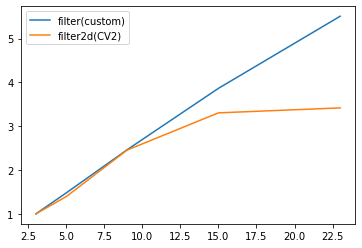

In [42]:
times_filter = np.array(times_filter)
times_cv2 = np.array(times_cv2)
x = np.array([3, 5, 9, 15, 23])
plt.plot(x, np.sqrt(times_filter / times_filter[0]), label='filter(custom)')
plt.plot(x, np.sqrt(times_cv2 / times_cv2[0]), label='filter2d(CV2)')
plt.legend()
plt.show()

###### From the above graph, we can see that our custom algorithm is almost $\mathcal{O}(N^2)$ (The blue line), but the filter function from Open CV (The orange line) is not.

###### This is because the filtering function in Open CV uses discrete Fourier transform (DFT) based algorithm for sufficiently large size of filter ($N \ge 11$) since it is more computationally efficient, perhaps it uses the direct algorithm for smaller filters, as ours.

###### We can see that two graphs are similar for filters of size $N = 3,\; 5,\; 9$, but different for larger filters (i.e., $N = 15, \; 23$).